In [64]:
import folium
import requests
import pandas
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
import datetime
from datetime import date
import calendar
import warnings
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

# Intro

explanation of project
data lifecycle


#### Reasources need for project
Explain each and give reasoures on how to use 
1. numpy- 
2. pandas-
3. matplotlib-
4. seaborn- 
5. datetime-
6. Voilin Plot-
7. Follium- 
8. KMEANS- 


In [2]:
# Map of DC
map_osm = folium.Map(location=[38.9072, -77.0369], zoom_start=11)
map_osm

# Data Collection 

In [3]:
crime_data = pandas.read_csv("Crime_Incidents_in_2019.csv")
crime_data.head(5)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.029707,38.939217,19081581,2019/05/12 17:07:34+00,DAY,OTHERS,THEFT F/AUTO,3900 - 3999 BLOCK OF 13TH STREET NW,397424.68,141258.25,...,002502 1,2502.0,Precinct 47,38.939209,-77.029705,NaN,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,83121287,NaN
1,-77.034603,38.932575,19081589,2019/05/12 16:31:46+00,DAY,OTHERS,THEFT/OTHER,1400 - 1599 BLOCK OF NEWTON STREET NW,396999.96,140521.12,...,002801 1,2801.0,Precinct 41,38.932567,-77.034601,NaN,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,83121288,NaN
2,-77.085291,38.959920,19081603,2019/05/12 17:18:34+00,DAY,OTHERS,THEFT/OTHER,5300 - 5399 BLOCK OF WISCONSIN AVENUE NW,392607.98,143559.50,...,001100 2,1100.0,Precinct 32,38.959912,-77.085288,NaN,2019/05/12 16:12:47+00,NaN,83121289,NaN
3,-77.026511,38.897356,19081606,2019/05/12 17:39:46+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF F STREET NW,397700.46,136611.23,...,005800 1,5800.0,Precinct 129,38.897348,-77.026509,DOWNTOWN,2019/05/12 17:07:36+00,NaN,83121290,NaN
4,-77.028233,38.957823,19081612,2019/05/12 18:26:51+00,DAY,OTHERS,BURGLARY,5600 - 5699 BLOCK OF GEORGIA AVENUE NW,397553.15,143323.63,...,002002 2,2002.0,Precinct 54,38.957815,-77.028231,NaN,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,83121291,NaN


# Data Processing
Removing columns we don't need

In [4]:
cords = np.array(crime_data[['LATITUDE','LONGITUDE']])
crime_data['CORDS'] = cords.tolist()
crime_data['time'] = pandas.to_datetime(crime_data['START_DATE'],format= '%H:%M',exact=False).dt.hour
crime_data = crime_data.drop(columns=['VOTING_PRECINCT','BID','OBJECTID','OCTO_RECORD_ID','CCN','X','Y','REPORT_DAT','SHIFT','BLOCK','XBLOCK','YBLOCK','WARD','ANC','DISTRICT','PSA','NEIGHBORHOOD_CLUSTER','BLOCK_GROUP','CENSUS_TRACT'])
crime_data

,METHOD,OFFENSE,LATITUDE,LONGITUDE,START_DATE,END_DATE,CORDS,time
0,OTHERS,THEFT F/AUTO,38.939209,-77.029705,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,"[38.9392090053, -77.0297051135]",3
1,OTHERS,THEFT/OTHER,38.932567,-77.034601,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,"[38.9325673709, -77.0346008373]",15
2,OTHERS,THEFT/OTHER,38.959912,-77.085288,2019/05/12 16:12:47+00,NaN,"[38.9599119666, -77.085288276]",16
3,OTHERS,THEFT/OTHER,38.897348,-77.026509,2019/05/12 17:07:36+00,NaN,"[38.8973478904, -77.0265085554]",17
4,OTHERS,BURGLARY,38.957815,-77.028231,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,"[38.9578148866, -77.0282306394]",17
...,...,...,...,...,...,...,...,...
33911,OTHERS,THEFT F/AUTO,38.940274,-77.032729,2019/07/20 18:00:29+00,2019/07/23 18:47:29+00,"[38.9402738789, -77.0327286883]",18
33912,OTHERS,THEFT/OTHER,38.880276,-76.994977,2019/07/22 05:54:56+00,2019/07/22 05:55:18+00,"[38.880275773, -76.9949765956]",5
33913,OTHERS,THEFT F/AUTO,38.925815,-77.100822,2019/07/23 16:30:33+00,2019/07/23 17:25:54+00,"[38.9258152896, -77.1008215022]",16
33914,OTHERS,THEFT/OTHER,38.948792,-77.078746,2019/07/23 18:05:57+00,2019/07/23 19:10:12+00,"[38.9487916125, -77.0787458915]",18


Explain added data

In [5]:
crime_data['day'] = pandas.to_datetime(crime_data['START_DATE'],exact=False).dt.day
crime_data['month'] = pandas.to_datetime(crime_data['START_DATE'],exact=False).dt.month

days_before_each_month = [0,31,59,90,120,151,181,212,243,273,304,334]

def find_day_of_year(row):
    month = row['month']
    day = row['day']
    return days_before_each_month[month-1] + day

crime_data['day_of_year'] = crime_data.apply(lambda row: find_day_of_year(row), axis=1)
crime_data['weekday'] = crime_data.apply(lambda row: pandas.Timestamp(row['START_DATE']).day_name(), axis=1)
crime_data

,METHOD,OFFENSE,LATITUDE,LONGITUDE,START_DATE,END_DATE,CORDS,time,day,month,day_of_year,weekday
0,OTHERS,THEFT F/AUTO,38.939209,-77.029705,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,"[38.9392090053, -77.0297051135]",3,12,5,132,Sunday
1,OTHERS,THEFT/OTHER,38.932567,-77.034601,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,"[38.9325673709, -77.0346008373]",15,12,5,132,Sunday
2,OTHERS,THEFT/OTHER,38.959912,-77.085288,2019/05/12 16:12:47+00,NaN,"[38.9599119666, -77.085288276]",16,12,5,132,Sunday
3,OTHERS,THEFT/OTHER,38.897348,-77.026509,2019/05/12 17:07:36+00,NaN,"[38.8973478904, -77.0265085554]",17,12,5,132,Sunday
4,OTHERS,BURGLARY,38.957815,-77.028231,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,"[38.9578148866, -77.0282306394]",17,12,5,132,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
33911,OTHERS,THEFT F/AUTO,38.940274,-77.032729,2019/07/20 18:00:29+00,2019/07/23 18:47:29+00,"[38.9402738789, -77.0327286883]",18,20,7,201,Saturday
33912,OTHERS,THEFT/OTHER,38.880276,-76.994977,2019/07/22 05:54:56+00,2019/07/22 05:55:18+00,"[38.880275773, -76.9949765956]",5,22,7,203,Monday
33913,OTHERS,THEFT F/AUTO,38.925815,-77.100822,2019/07/23 16:30:33+00,2019/07/23 17:25:54+00,"[38.9258152896, -77.1008215022]",16,23,7,204,Tuesday
33914,OTHERS,THEFT/OTHER,38.948792,-77.078746,2019/07/23 18:05:57+00,2019/07/23 19:10:12+00,"[38.9487916125, -77.0787458915]",18,23,7,204,Tuesday


Added season

In [29]:
# Determines the season (szn) of the crime (these dates are from 2019)
def find_szn(row):
    #First 4 if statements to decide on months where season changes
    if (row['month'] == 3):
        if (row['day'] < 20):
            return "Winter"
        else:
            return "Spring"
        
    elif (row['month'] == 6):
        if (row['day'] < 21):
            return "Spring"
        else:
            return "Summer"
        
    elif (row['month'] == 9):
        if (row['day'] < 23):
            return "Summer"
        else:
            return "Fall"
        
    elif (row['month'] == 12):
        if (row['day'] < 22):
            return "Fall"
        else:
            return "Winter"
        
    elif (row['month'] < 3):
        return "Winter"
    elif (row['month'] < 6):
        return "Spring"
    elif (row['month'] < 9):
        return "Summer"
    elif (row['month'] < 12):
        return "Fall"
    
    else:
        return "Fake Month!"
crime_data['season'] = crime_data.apply(lambda row: find_szn(row), axis=1)
crime_data

,METHOD,OFFENSE,LATITUDE,LONGITUDE,START_DATE,END_DATE,CORDS,time,day,month,day_of_year,weekday,season
0,OTHERS,THEFT F/AUTO,38.939209,-77.029705,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,"[38.9392090053, -77.0297051135]",3,12,5,132,Sunday,Spring
1,OTHERS,THEFT/OTHER,38.932567,-77.034601,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,"[38.9325673709, -77.0346008373]",15,12,5,132,Sunday,Spring
2,OTHERS,THEFT/OTHER,38.959912,-77.085288,2019/05/12 16:12:47+00,NaN,"[38.9599119666, -77.085288276]",16,12,5,132,Sunday,Spring
3,OTHERS,THEFT/OTHER,38.897348,-77.026509,2019/05/12 17:07:36+00,NaN,"[38.8973478904, -77.0265085554]",17,12,5,132,Sunday,Spring
4,OTHERS,BURGLARY,38.957815,-77.028231,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,"[38.9578148866, -77.0282306394]",17,12,5,132,Sunday,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33911,OTHERS,THEFT F/AUTO,38.940274,-77.032729,2019/07/20 18:00:29+00,2019/07/23 18:47:29+00,"[38.9402738789, -77.0327286883]",18,20,7,201,Saturday,Summer
33912,OTHERS,THEFT/OTHER,38.880276,-76.994977,2019/07/22 05:54:56+00,2019/07/22 05:55:18+00,"[38.880275773, -76.9949765956]",5,22,7,203,Monday,Summer
33913,OTHERS,THEFT F/AUTO,38.925815,-77.100822,2019/07/23 16:30:33+00,2019/07/23 17:25:54+00,"[38.9258152896, -77.1008215022]",16,23,7,204,Tuesday,Summer
33914,OTHERS,THEFT/OTHER,38.948792,-77.078746,2019/07/23 18:05:57+00,2019/07/23 19:10:12+00,"[38.9487916125, -77.0787458915]",18,23,7,204,Tuesday,Summer


# Exploratory analysis

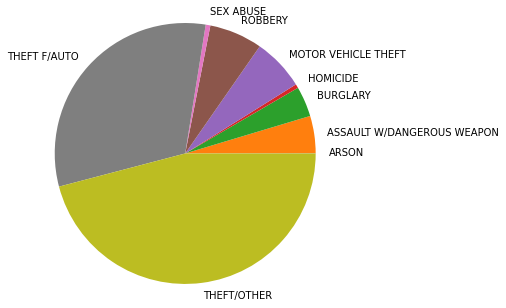

In [7]:
crimes, count = np.unique(crime_data['OFFENSE'],return_counts=True)
plt.pie(count,labels = crimes,radius = 1.5);

In [8]:
crime_type_table = crime_data['OFFENSE'].value_counts()
crime_type_table

THEFT/OTHER                   15571
THEFT F/AUTO                  10719
ROBBERY                        2232
MOTOR VEHICLE THEFT            2186
ASSAULT W/DANGEROUS WEAPON     1567
BURGLARY                       1272
SEX ABUSE                       197
HOMICIDE                        164
ARSON                             8
Name: OFFENSE, dtype: int64

Only want to look at the top 5 crimes  

In [9]:
top_crime_table = crime_type_table[:5]
top_crime_data = crime_data[crime_data['OFFENSE'].isin(top_crime_table.index)]
top_crime_table

THEFT/OTHER                   15571
THEFT F/AUTO                  10719
ROBBERY                        2232
MOTOR VEHICLE THEFT            2186
ASSAULT W/DANGEROUS WEAPON     1567
Name: OFFENSE, dtype: int64

# Data viz

[Text(0.5, 1.0, 'Total THEFT/OTHER Crime per Hour')]

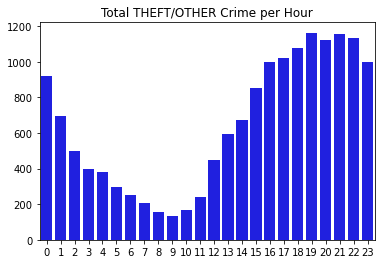

In [10]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'THEFT/OTHER'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total THEFT/OTHER Crime per Hour")

[Text(0.5, 1.0, 'Total THEFT F/AUTO Crime per Hour')]

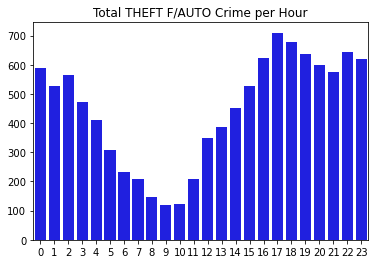

In [11]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'THEFT F/AUTO'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total THEFT F/AUTO Crime per Hour")

[Text(0.5, 1.0, 'Total ROBBERY Crime per Hour')]

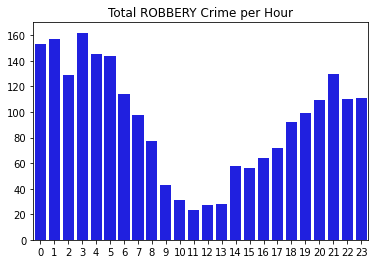

In [12]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'ROBBERY'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total ROBBERY Crime per Hour")

[Text(0.5, 1.0, 'Total MOTOR VEHICLE THEFT Crime per Hour')]

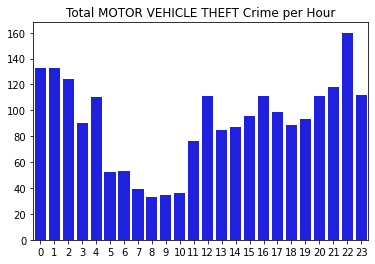

In [13]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'MOTOR VEHICLE THEFT'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total MOTOR VEHICLE THEFT Crime per Hour")

[Text(0.5, 1.0, 'Total ASSAULT W/DANGEROUS WEAPON Crime per Hour')]

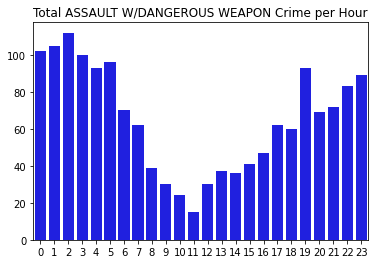

In [14]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total ASSAULT W/DANGEROUS WEAPON Crime per Hour")

How to see all top5 crimes on one graph 

<AxesSubplot:xlabel='time', ylabel='count'>

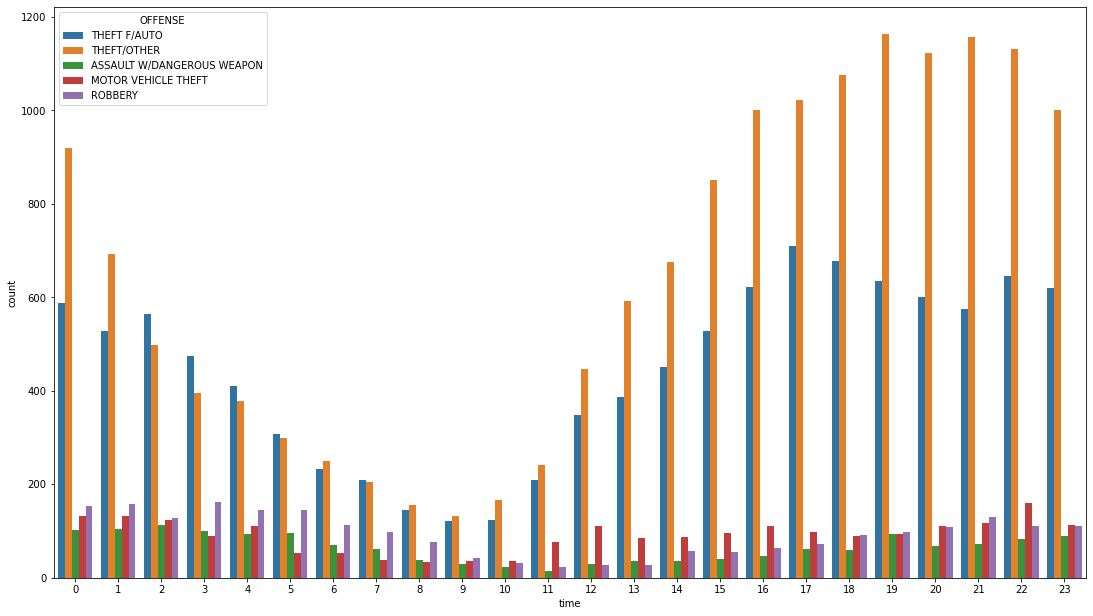

In [15]:
fig = plt.figure(figsize=(10,80))
fig.set_size_inches(18.5, 10.5)
sns.countplot(x="time", hue="OFFENSE", data=top_crime_data)

Better approach

<AxesSubplot:xlabel='time', ylabel='OFFENSE'>

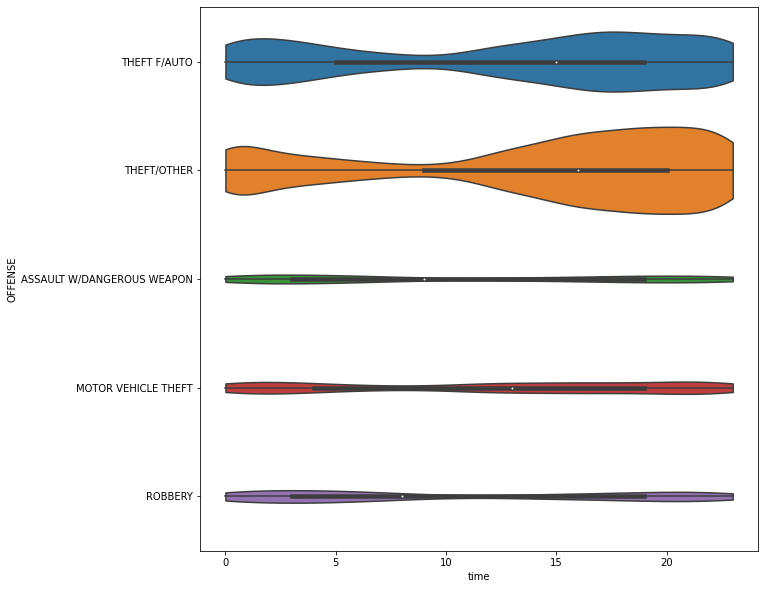

In [16]:
fig = plt.figure(figsize=(10,10))

sns.violinplot(data=top_crime_data, x = 'time',y='OFFENSE',cut=0,scale='count')

# Analysis, hypothesis testing, & ML
Looking at Assault W/Dangerous Weapon 

[Text(0.5, 1.0, 'Total ASSAULT W/DANGEROUS WEAPON Crime per Day of Year')]

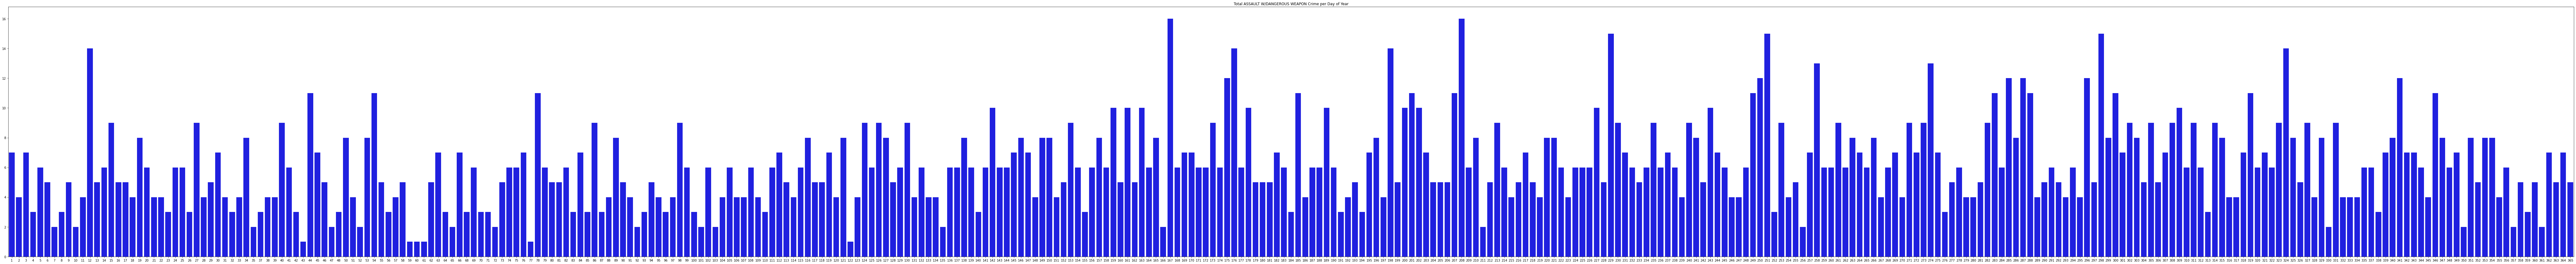

In [17]:
crime_type = 'ROBBERY'
fig = plt.figure(figsize=(150,15))
day, count = np.unique(crime_data[(crime_data['OFFENSE'] == crime_type)].day_of_year,return_counts=True)
sns.barplot(day,count,color = 'blue').set(title="Total ASSAULT W/DANGEROUS WEAPON Crime per Day of Year")


[Text(0.5, 1.0, 'Total ASSAULT W/DANGEROUS WEAPON Crime per Month')]

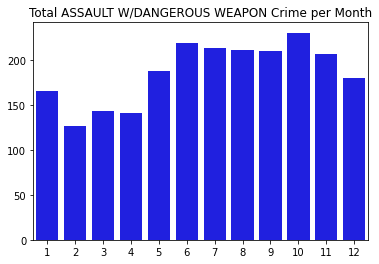

In [18]:
# Created the month column wiht the just int of the month

month, crime_count = np.unique(crime_data[(crime_data['OFFENSE'] == crime_type)].month,return_counts=True)
sns.barplot(month,crime_count,color = 'blue').set(title="Total ASSAULT W/DANGEROUS WEAPON Crime per Month")

[Text(0.5, 1.0, 'Total ASSAULT W/DANGEROUS WEAPON Crime per Season')]

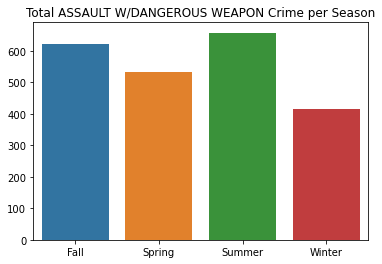

In [19]:
# Create a season column for the dataframe

szn, crime_count = np.unique(crime_data[(crime_data['OFFENSE'] == crime_type)].season,return_counts=True)
sns.barplot(szn,crime_count).set(title="Total ASSAULT W/DANGEROUS WEAPON Crime per Season")


[Text(0.5, 1.0, 'Total ASSAULT W/DANGEROUS WEAPON Crime per Day of The Week')]

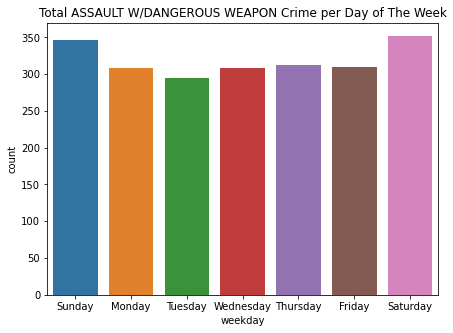

In [20]:
fig = plt.figure(figsize=(7,5))
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.countplot(x="weekday", data=crime_data[crime_data['OFFENSE'] == crime_type],order=order).set(title="Total ASSAULT W/DANGEROUS WEAPON Crime per Day of The Week")


See if there is a Correlation bewteen amount of assault w/ weapon with the day of the year and week_day and season 

In [77]:
robbery_data = crime_data[crime_data['OFFENSE'] == 'ROBBERY']
day, count = np.unique(robbery_data['day_of_year'],return_counts=True)
subset = robbery_data.drop_duplicates(subset='day_of_year').sort_values(by='day_of_year')
robbery_per_day_data = subset[['day_of_year','weekday','season']]
robbery_per_day_data['amount_of_crime'] = count
Y = robbery_per_day_data['amount_of_crime']
X = pandas.get_dummies(data=robbery_per_day_data).drop(columns=['amount_of_crime'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.0686475127127455

<AxesSubplot:xlabel='amount_of_crime'>

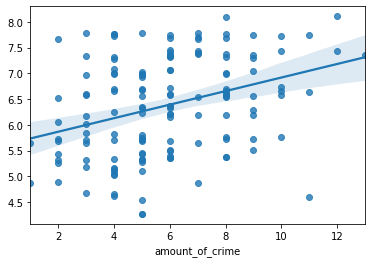

In [78]:
predictions = model.predict(X_test)
sns.regplot(y_test,predictions)

# Mapping the crime 

##### To get an idea of what the crime spread looks like
Too many data points to graph plot on a map. Below is a not the best approach to visualize all of the crime in DC 

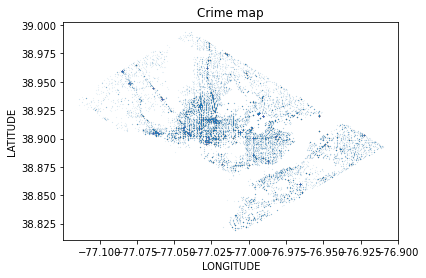

In [30]:
cords = crime_data['CORDS']
lat = [cord[0] for cord in cords]
long = [cord[1] for cord in cords]
plt.scatter(long,lat,s=.001)
plt.title("Crime map")
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.show()

##### Better Approach using KMEANS
Explanation of KMEANS

In [ ]:
x_limit = 30  #the x scale for the graph and the number of times KMEANS is run

inertia = [] #kmeans error
cords = np.array(crime_data[['LATITUDE','LONGITUDE']])
for i in range(1,x_limit+1):
    kmeans = KMeans(i) # ith KMEANS 
    kmeans.fit(cords)      # fit it to the data
    inertia.append(kmeans.inertia_)  # appened the error to the inertia array

number_clusters = [i for i in range(1,x_limit+1)]
plt.plot(number_clusters,inertia)  # Ploting the Error Of KMEANS
plt.title('Error Of KMEANS')
plt.xlabel('Number of clusters')
plt.ylabel('Squared Error');

In [ ]:
number_of_clusters = 20
kmeans = KMeans(number_of_clusters) # ith KMEANS 
kmeans.fit(cords)
total_crime = crime_data.shape[0] # Gets number of rows
crime_density = [] # getting the number of crimes per cluster
for i in range(number_of_clusters):
    crime_density.append(list(kmeans.labels_).count(i)/total_crime)

In [ ]:
map_osm = folium.Map(location=[38.9072, -77.0369], zoom_start=11)
for i in range(number_of_clusters):
    folium.Circle(
        radius =crime_density[i]*10000,
        location=[kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1]],
        color="red",
    fill=True,
    ).add_to(map_osm)# add circle to the map   
map_osm